In [1]:
from spikingjelly.activation_based.layer import SynapseFilter
from spikingjelly.activation_based.neuron import LIFNode, IFNode
from spikingjelly.visualizing import plot_1d_spikes, plot_2d_heatmap

import torch
import matplotlib.pyplot as plt

from utils.module import StochasticRound, JeffressLinear, TransposeLayer
from utils.model import L2Net
from utils.datasets import generate_lp_dataset, generate_cosine_dataset, generate_1d_dot_classification_dataset, encode_temporal
from utils.layer import LIF_Filter

In [2]:
torch.set_printoptions(threshold=10_000, precision=4, linewidth=160, sci_mode=False)

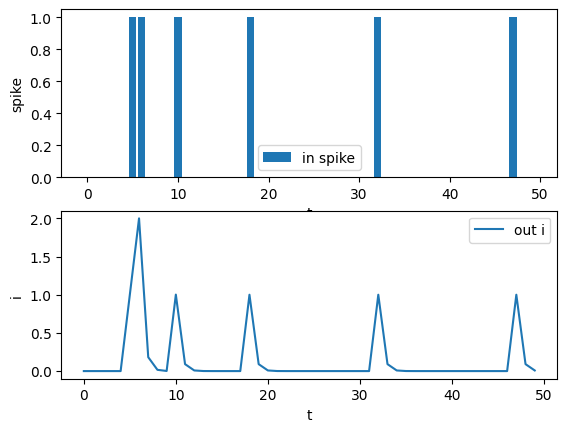

In [3]:
T = 50
in_spikes = (torch.rand(size=[T]) >= 0.95).float()
lp_syn = SynapseFilter(tau=1.1)
plt.subplot(2, 1, 1)
plt.bar(torch.arange(0, T).tolist(), in_spikes, label='in spike')
plt.xlabel('t')
plt.ylabel('spike')
plt.legend()

out_i = []
for i in range(T):
    out_i.append(lp_syn(in_spikes[i]))
plt.subplot(2, 1, 2)
plt.plot(out_i, label='out i')
plt.xlabel('t')
plt.ylabel('i')
plt.legend()
plt.show()

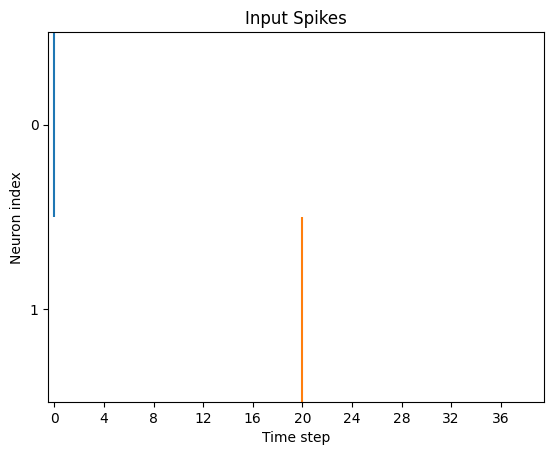

In [4]:
T = 40
gamma_r = 1.58197670686933
gamma_d = 10.508331944775

f = SynapseFilter(tau=gamma_r, step_mode='m')
x = torch.nn.functional.one_hot(torch.tensor([0, T//2]), num_classes=T).T.reshape(T, 1, 1, 2).float()
plot_1d_spikes(x.squeeze().numpy(), title='Input Spikes', xlabel='Time step', ylabel='Neuron index', figsize=(8, 2), plot_firing_rate=False)
plt.show()

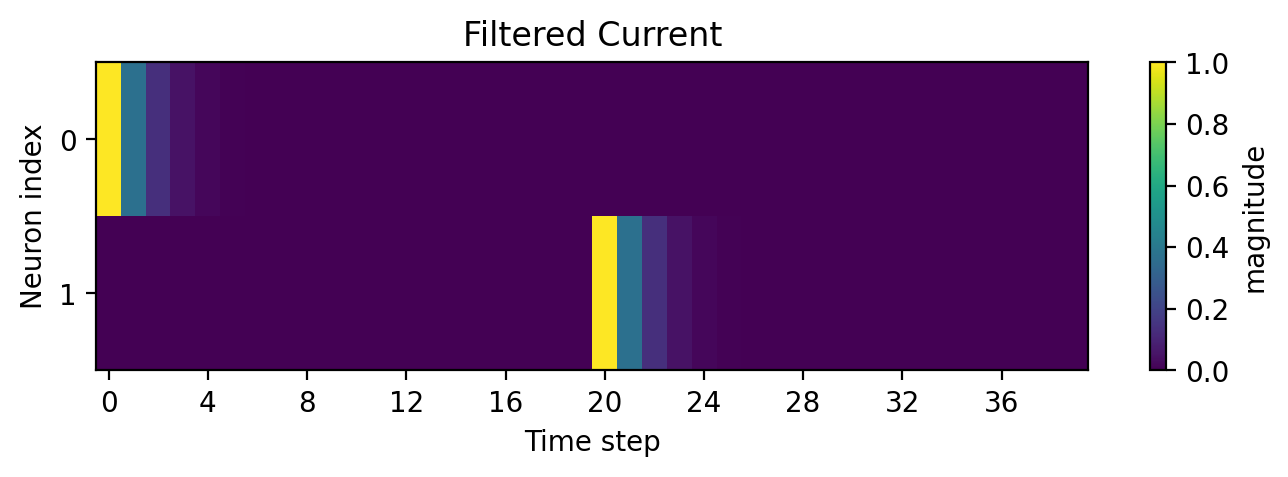

In [5]:
f(x)
plot_2d_heatmap(f(x).squeeze().numpy(), title='Filtered Current', xlabel='Time step', ylabel='Neuron index', figsize=(8,2))
plt.show()

In [6]:
f = LIF_Filter(lif_gamma=gamma_d, filter_gamma=gamma_r, step_mode='m')
n = IFNode(step_mode='m', store_v_seq=True)
# n(f(x))
# n.v_seq

In [7]:
j = JeffressLinear(T-1, bias=False)  # delay range: -T//2 ~ T//2
j(x).shape

torch.Size([40, 1, 1, 79])

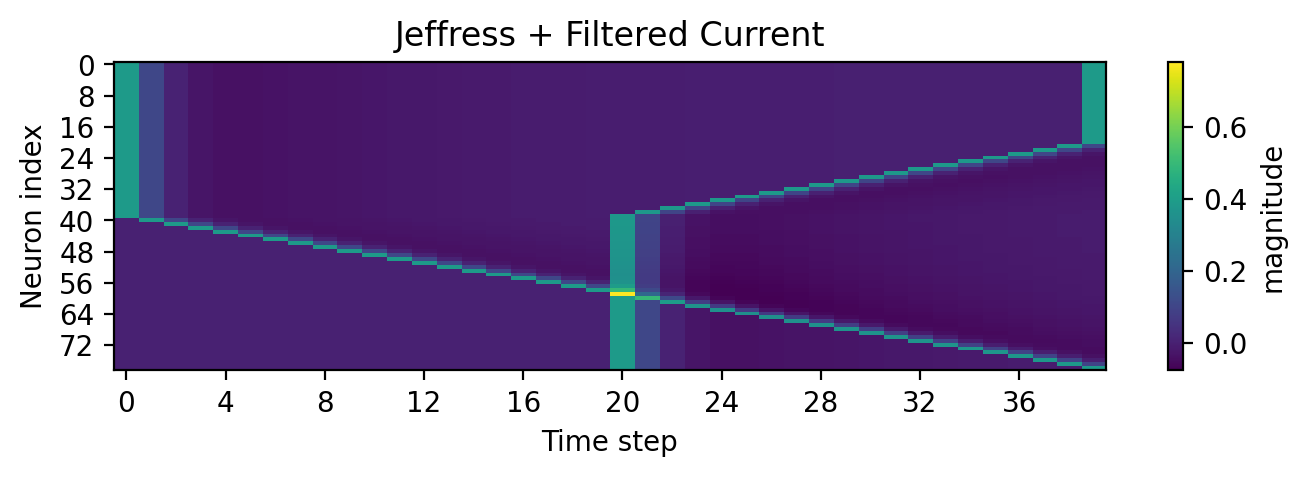

In [8]:
plot_2d_heatmap(j(x).squeeze().numpy(), title='Jeffress + Filtered Current', xlabel='Time step', ylabel='Neuron index', figsize=(8,2))
plt.show()

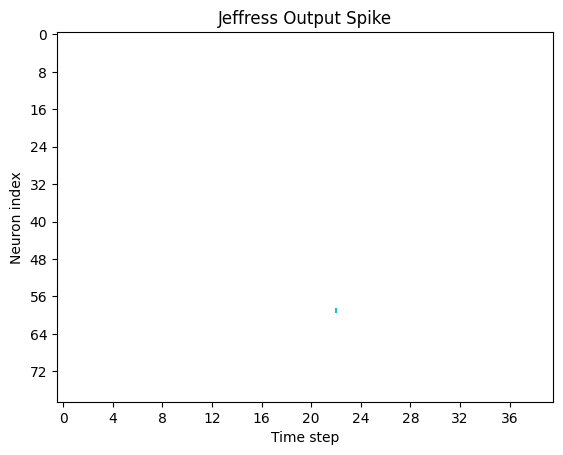

In [9]:
n = IFNode(step_mode='m', store_v_seq=True)
plot_1d_spikes(out:=n(j(x)).squeeze().numpy(), title='Jeffress Output Spike', xlabel='Time step', ylabel='Neuron index', figsize=(8, 4),
               dpi=200, plot_firing_rate=False)
plt.show()

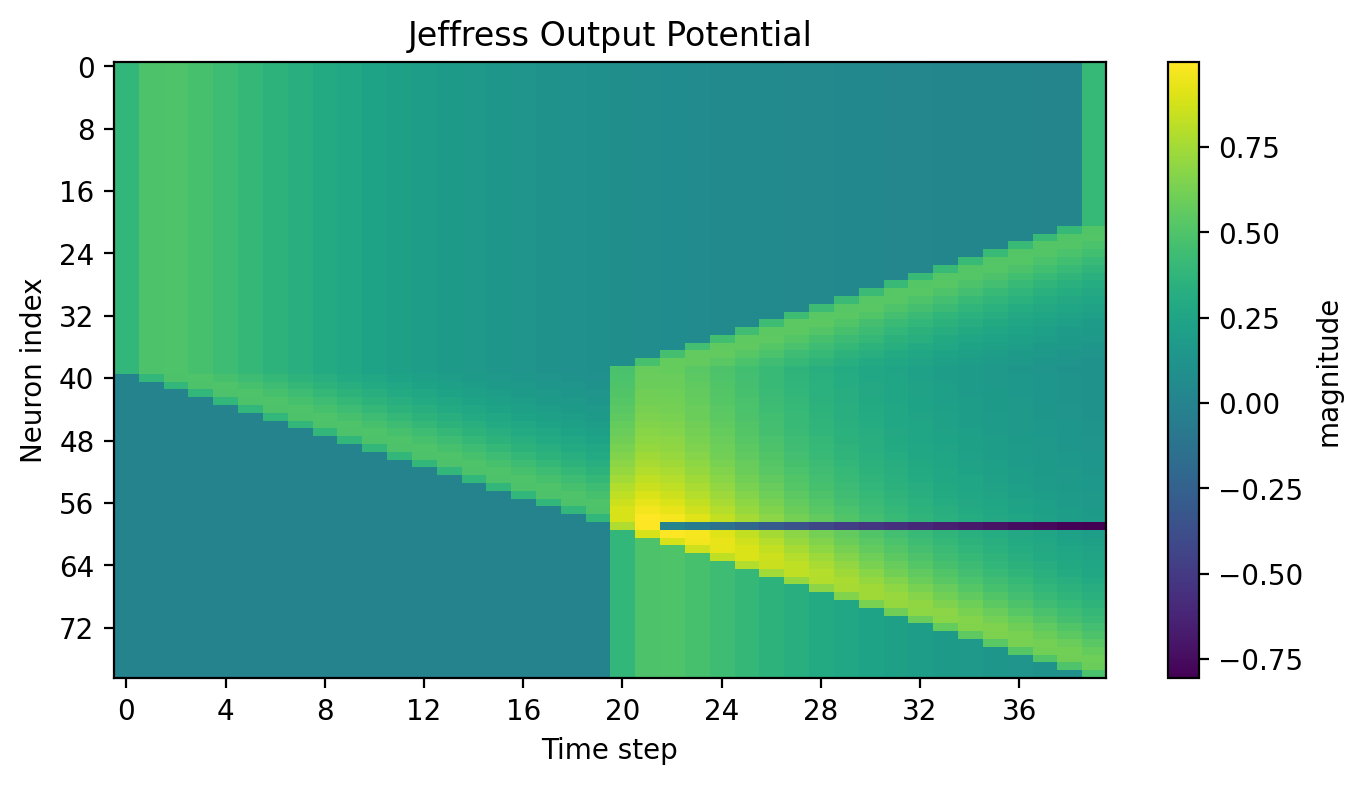

In [10]:
plot_2d_heatmap(n.v_seq.squeeze().numpy(), title='Jeffress Output Potential', xlabel='Time step', ylabel='Neuron index', figsize=(8, 4), dpi=200)
plt.show()

In [11]:
# n.v_seq

/opt/conda/envs/dt/lib/python3.12/site-packages/spikingjelly/visualizing/__init__.py:212: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, spikes_map = plt.subplots()


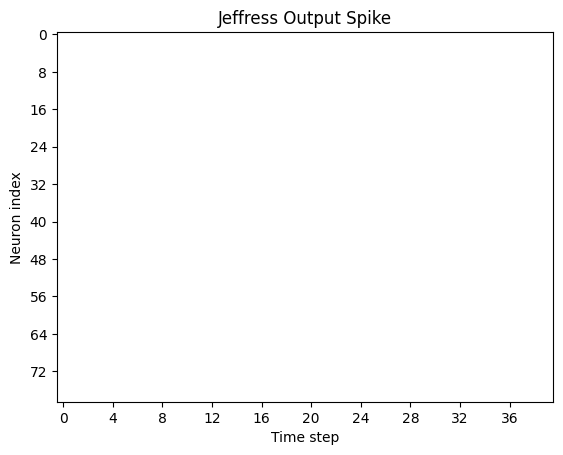

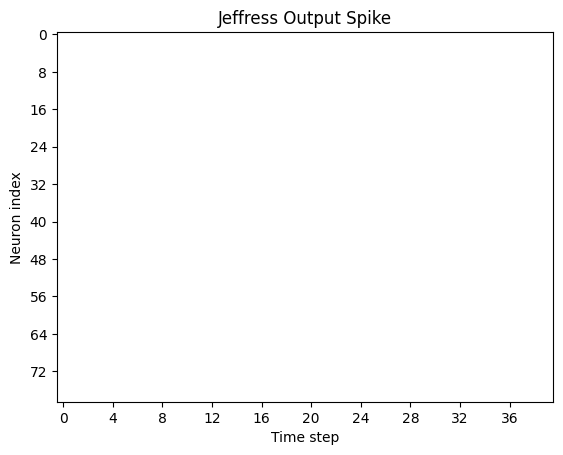

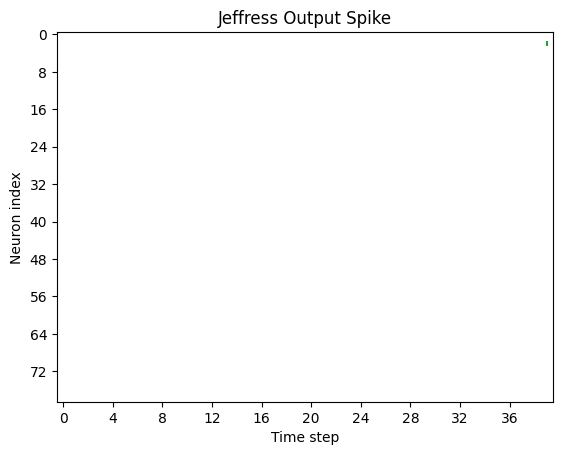

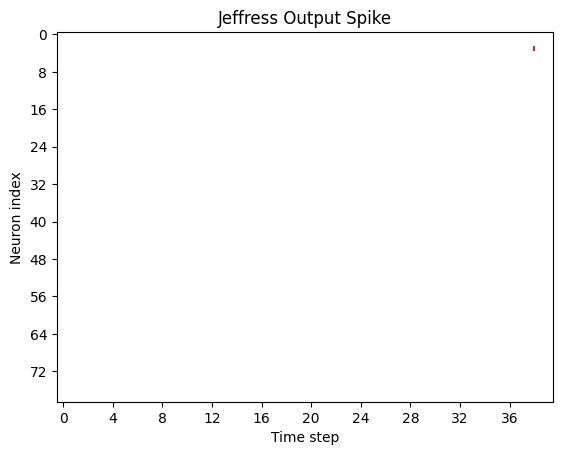

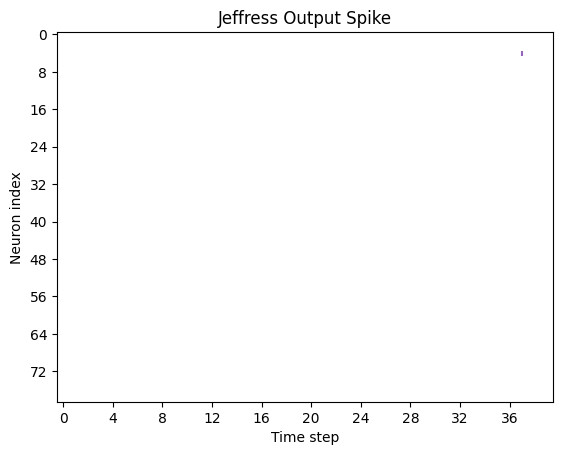

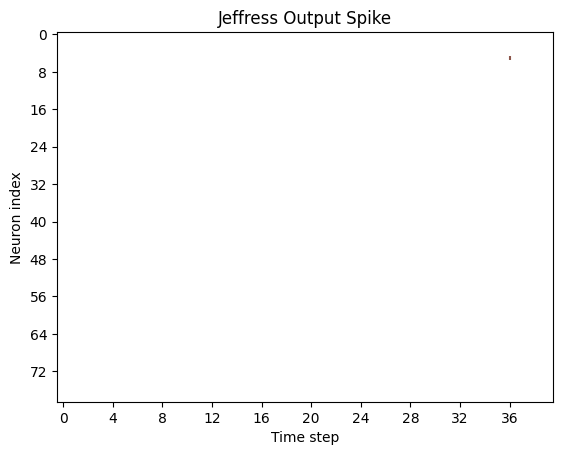

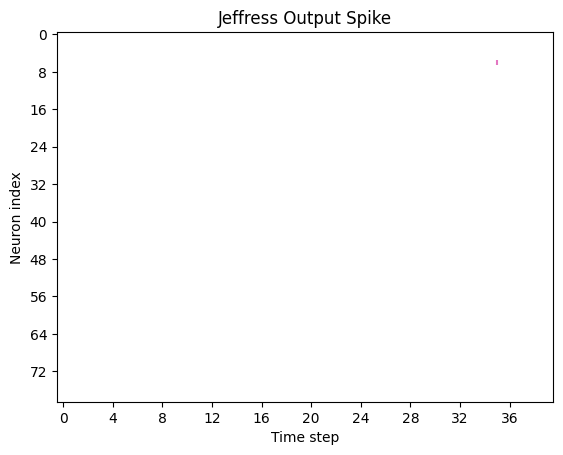

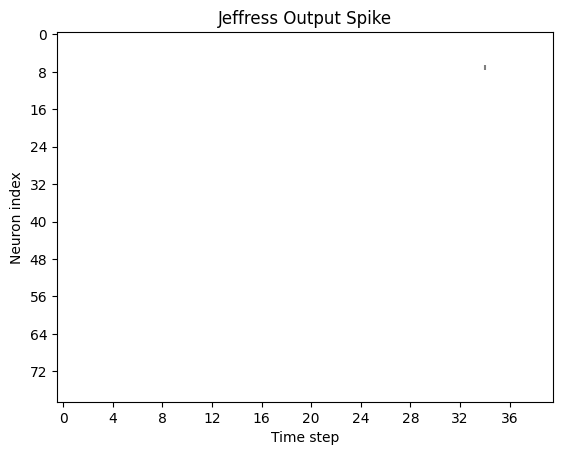

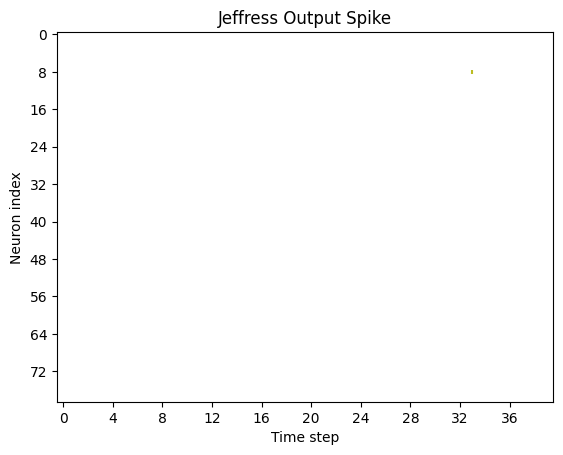

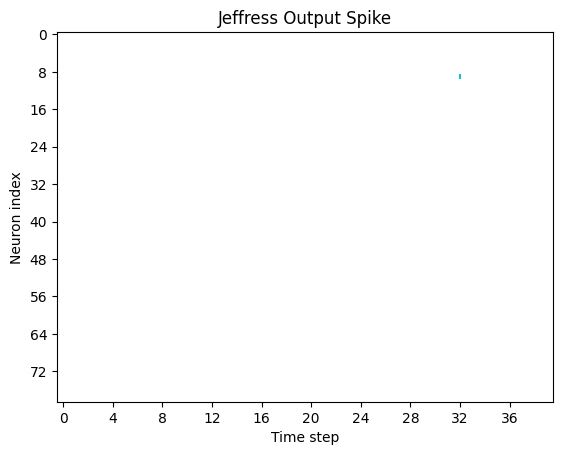

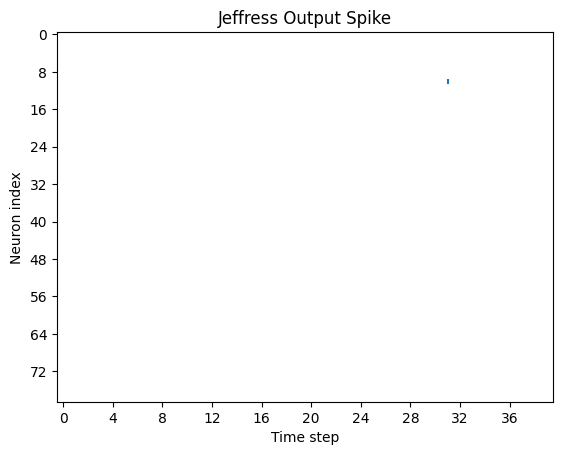

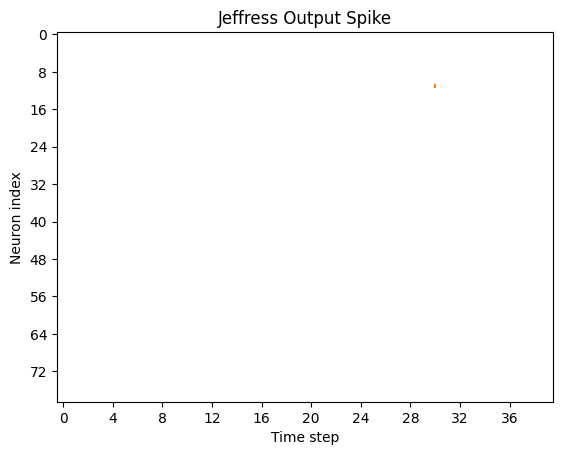

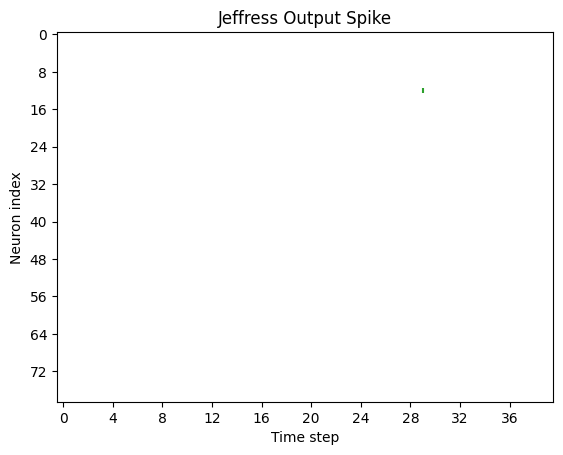

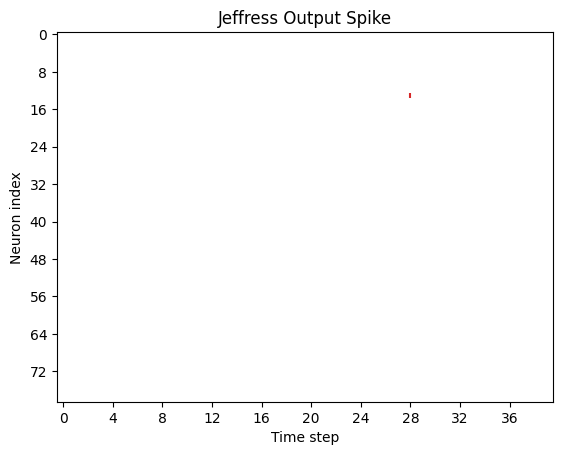

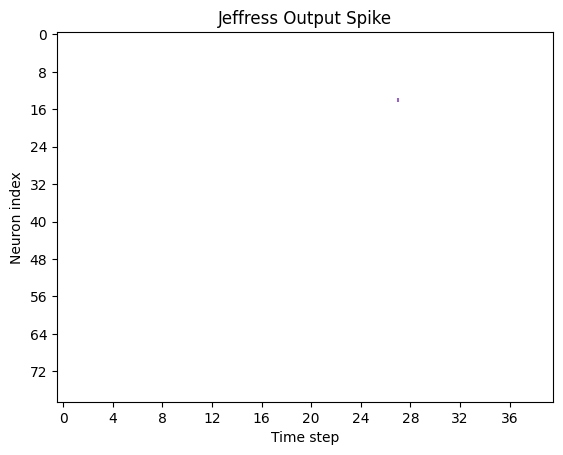

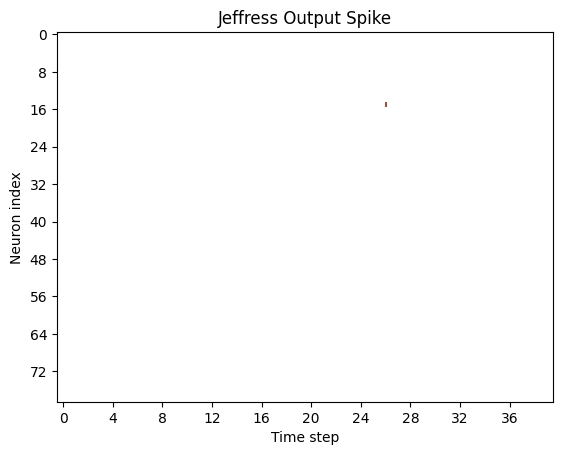

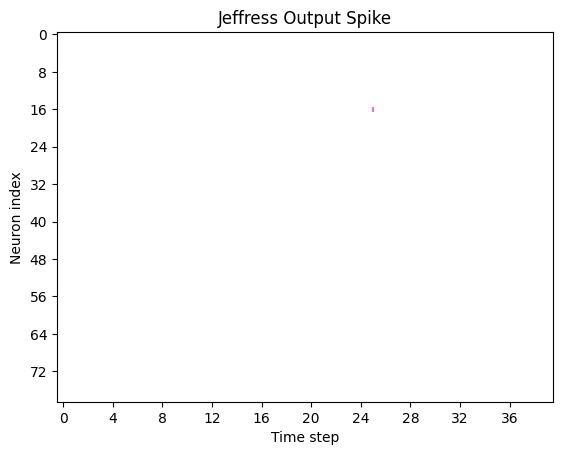

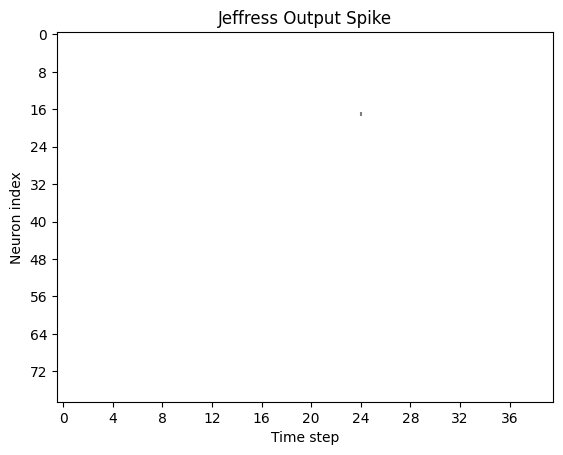

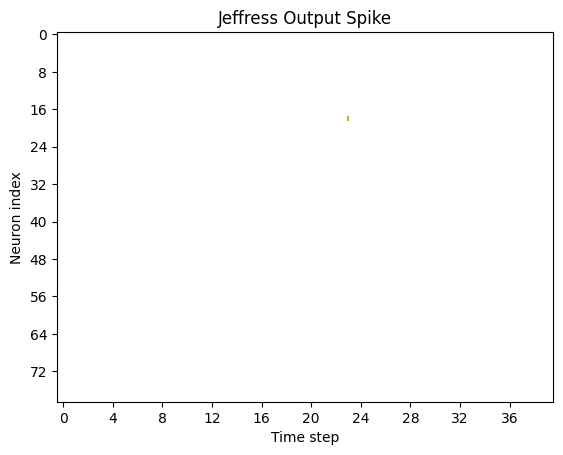

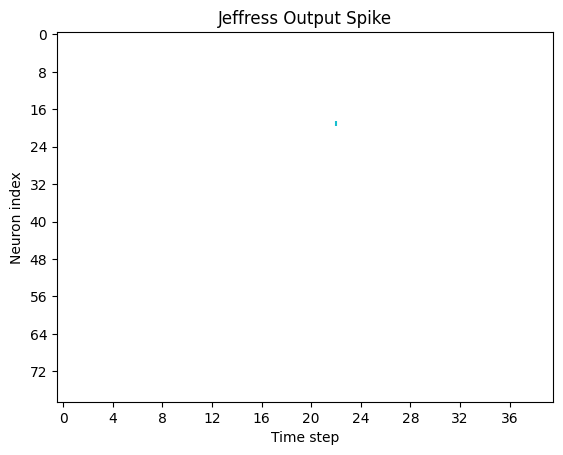

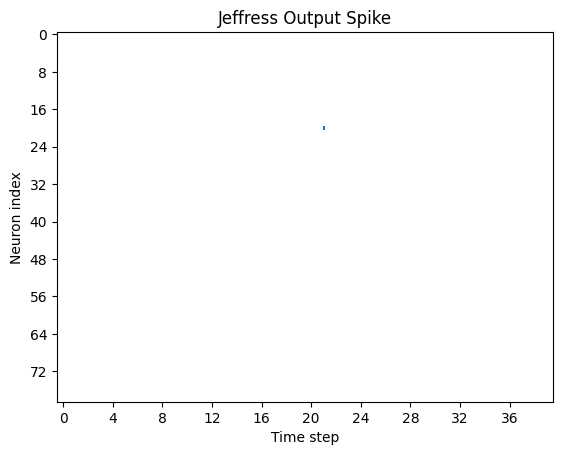

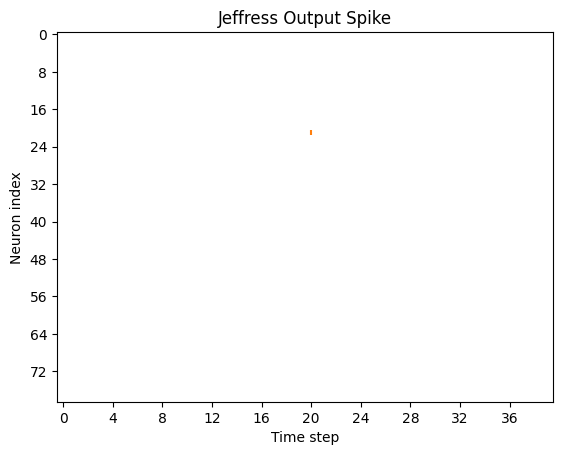

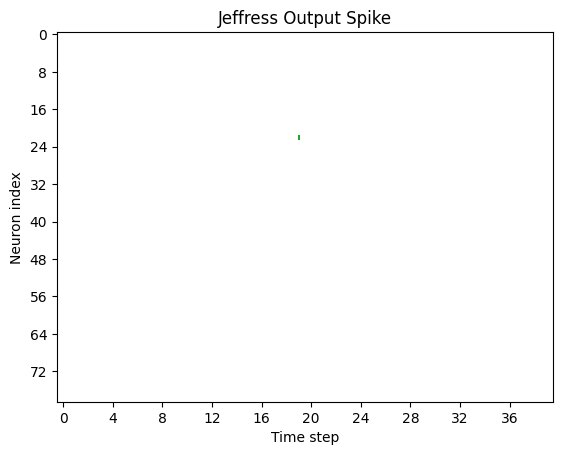

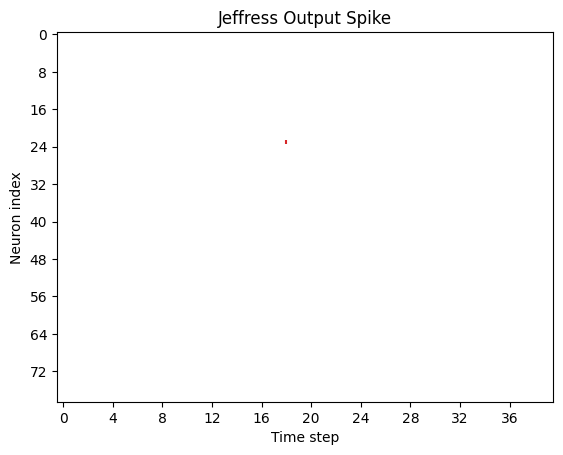

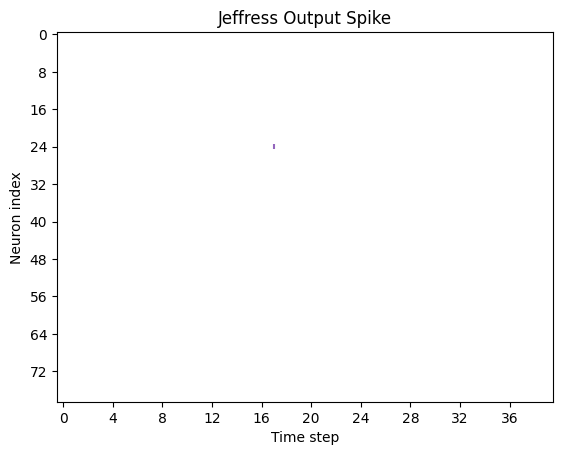

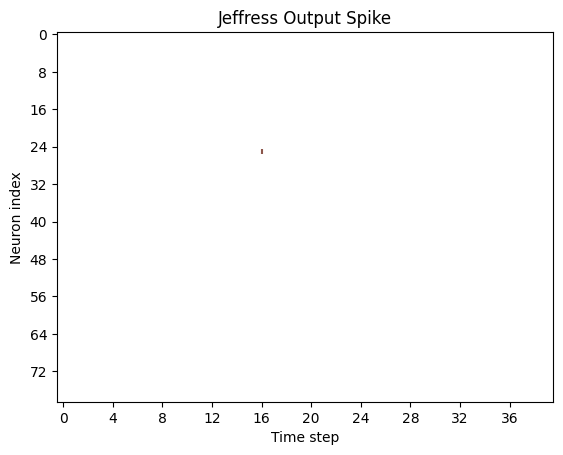

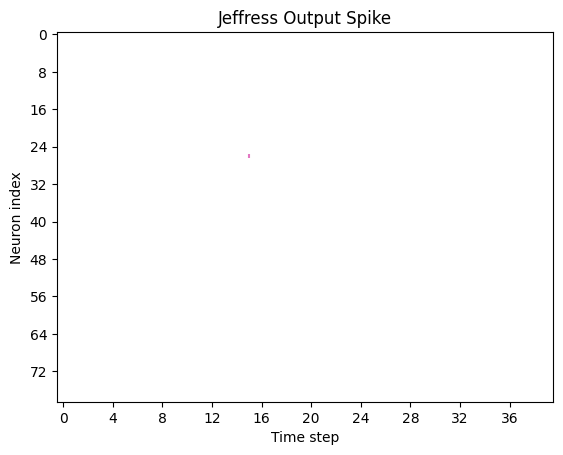

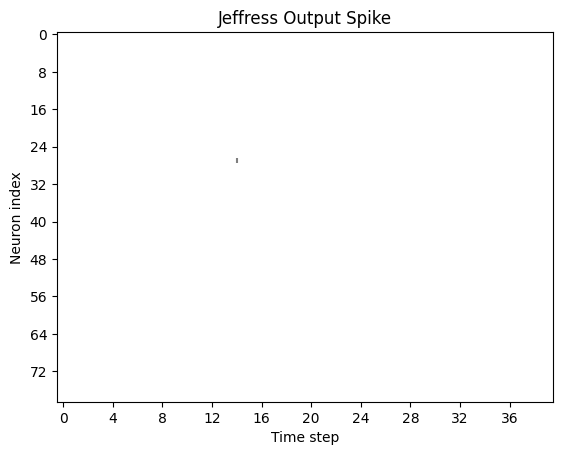

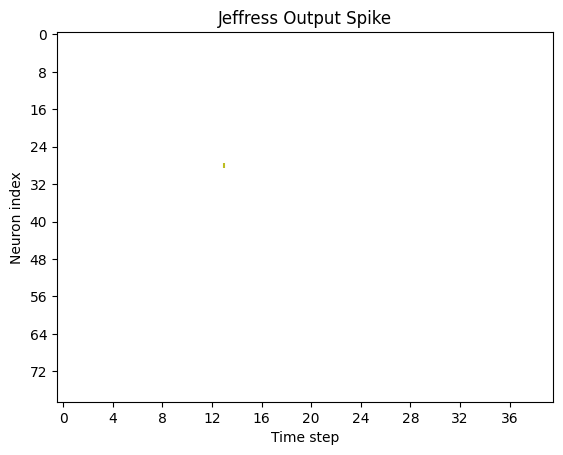

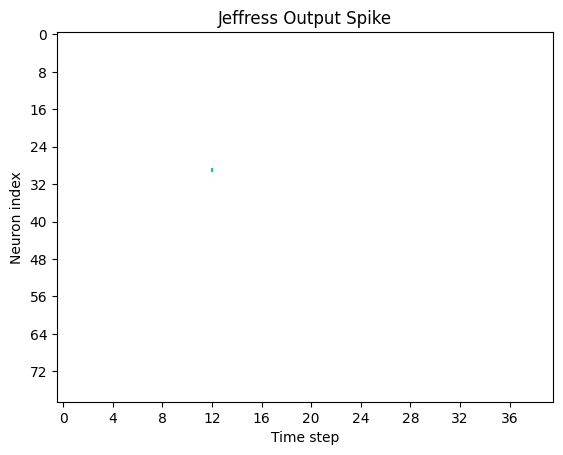

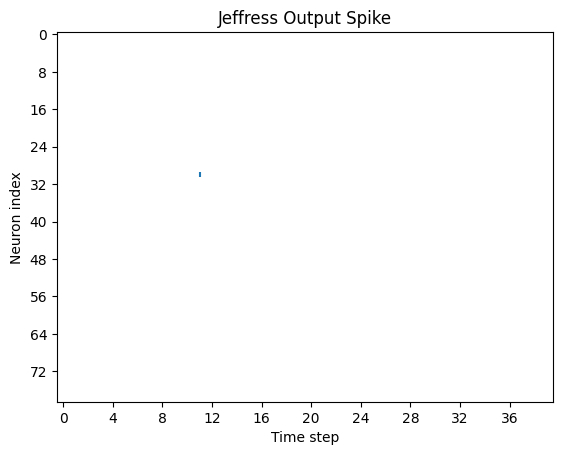

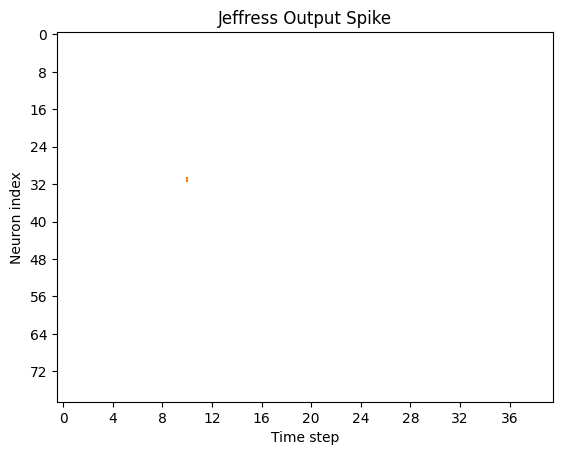

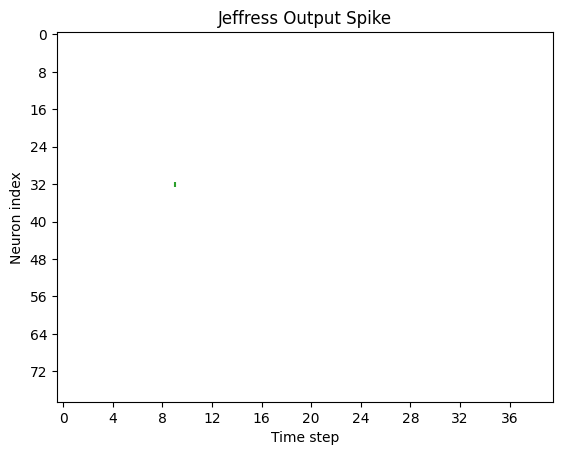

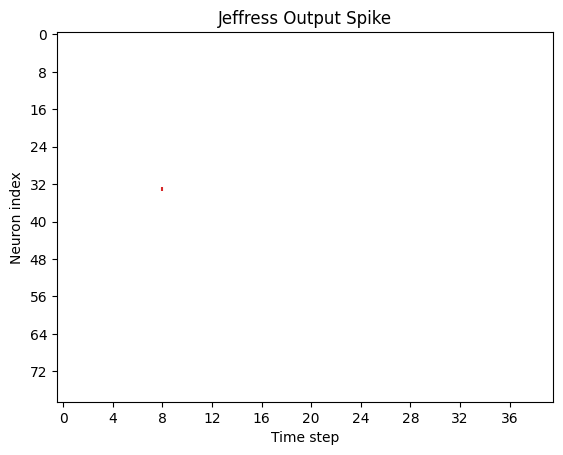

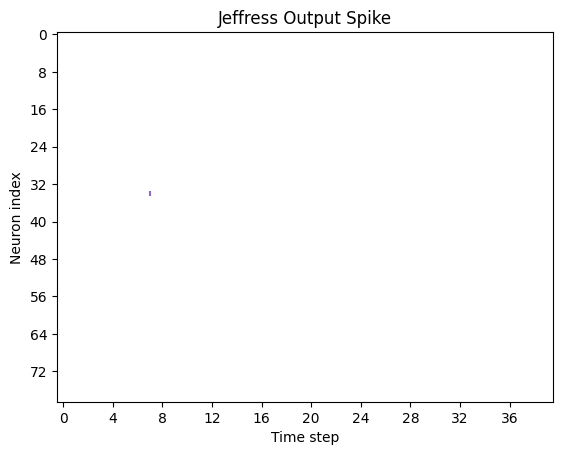

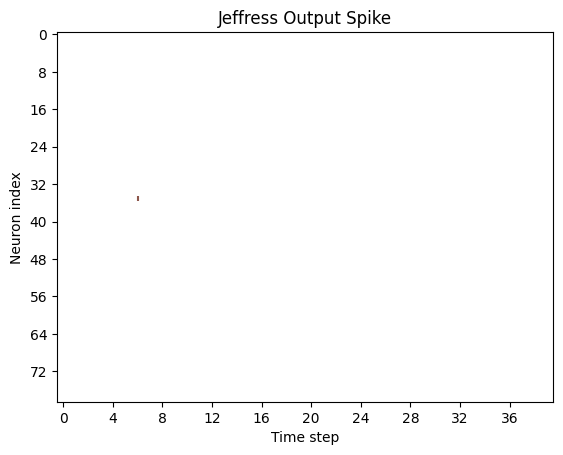

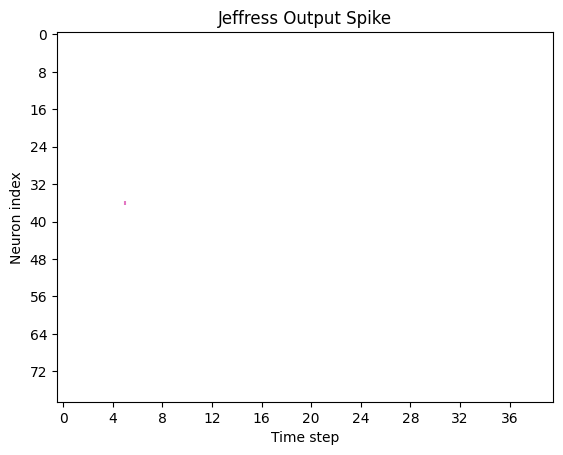

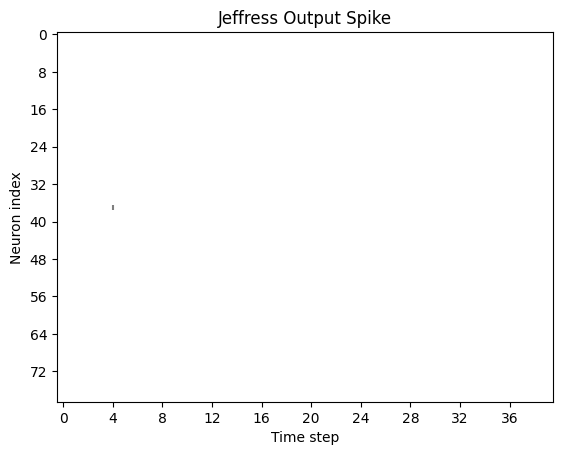

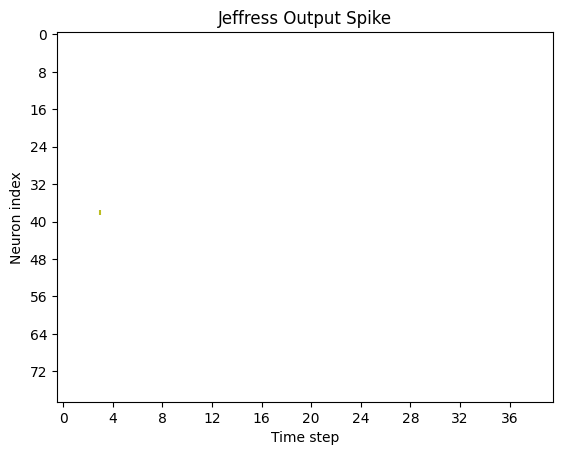

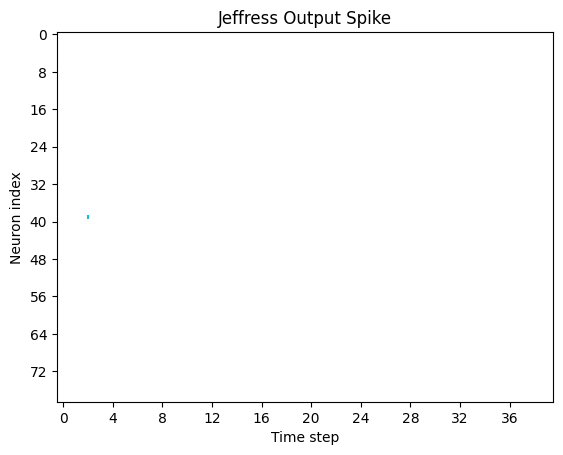

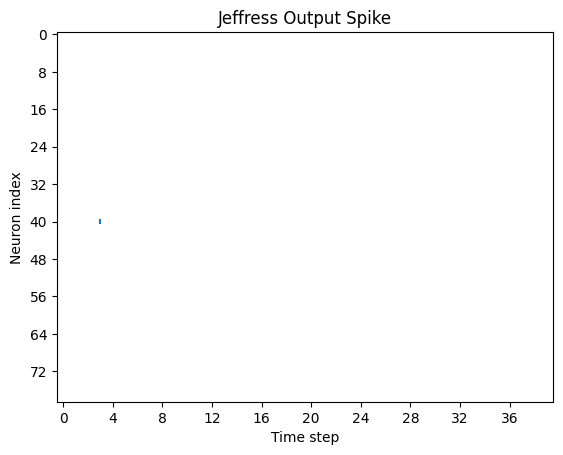

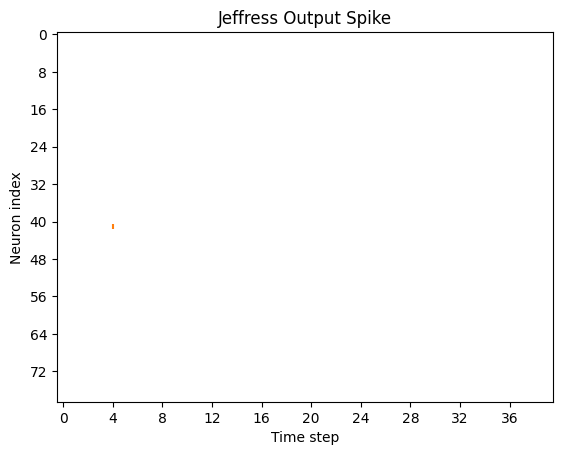

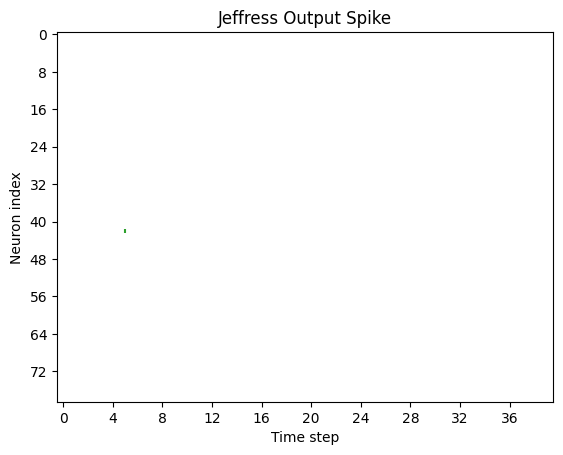

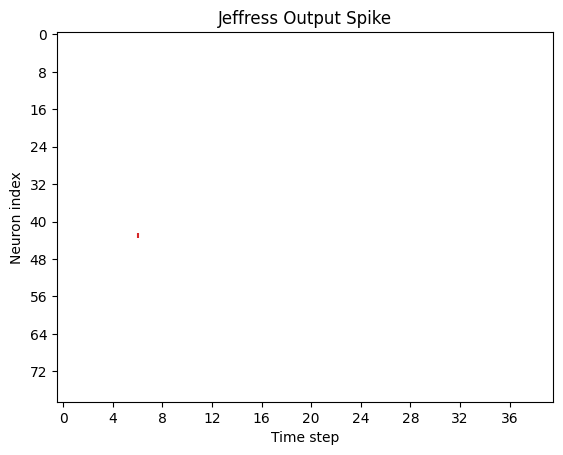

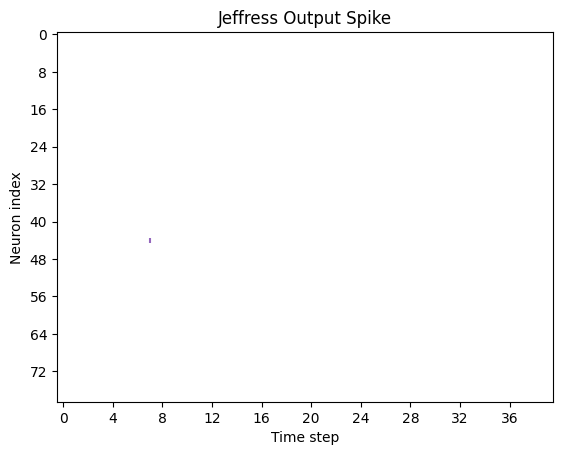

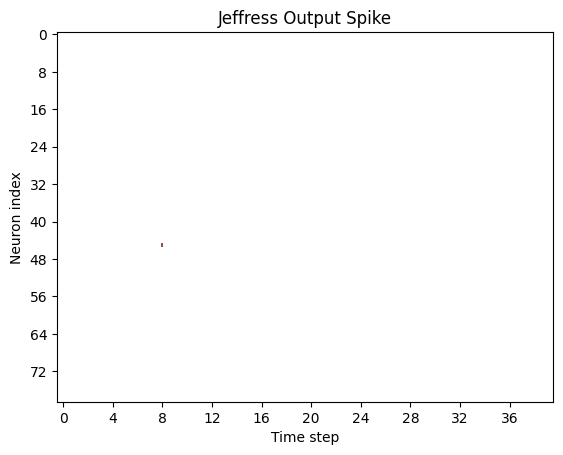

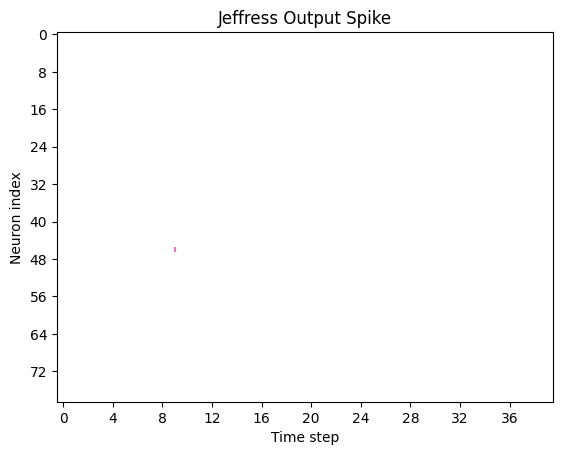

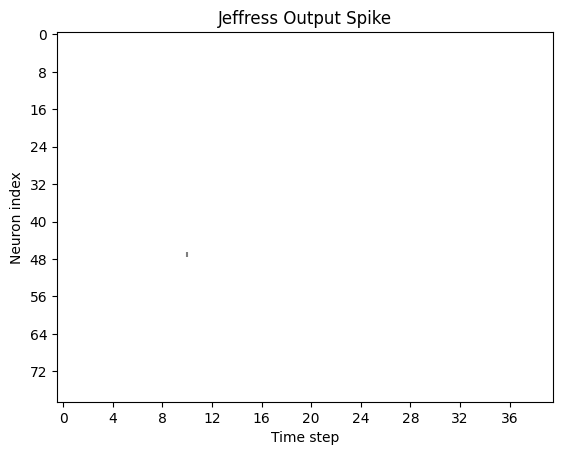

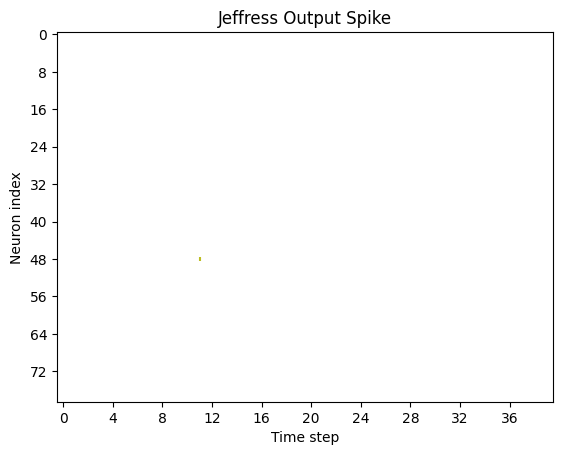

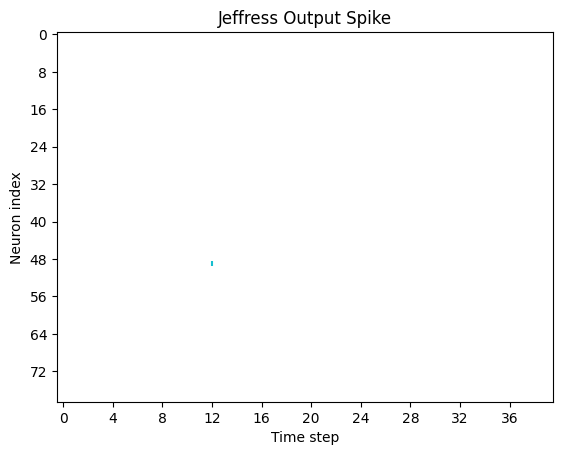

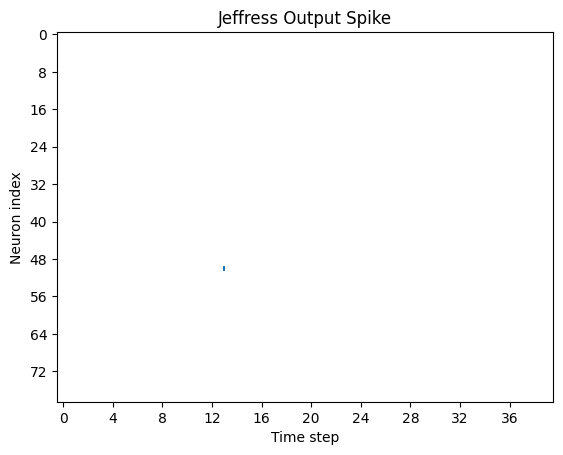

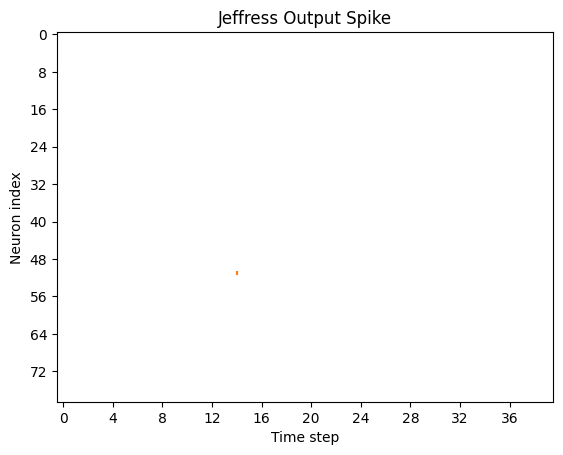

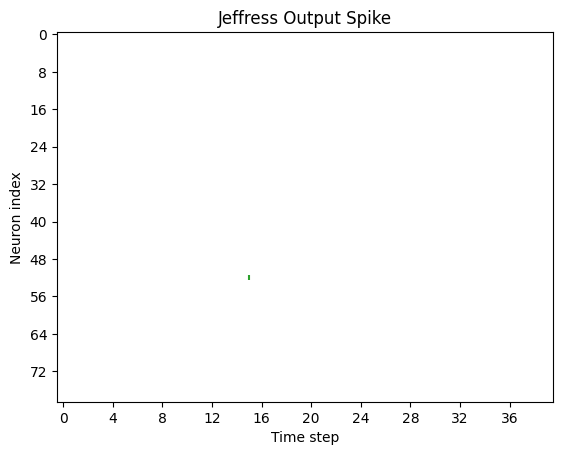

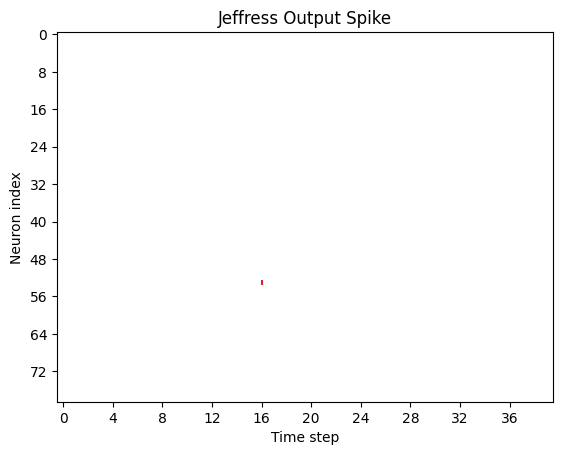

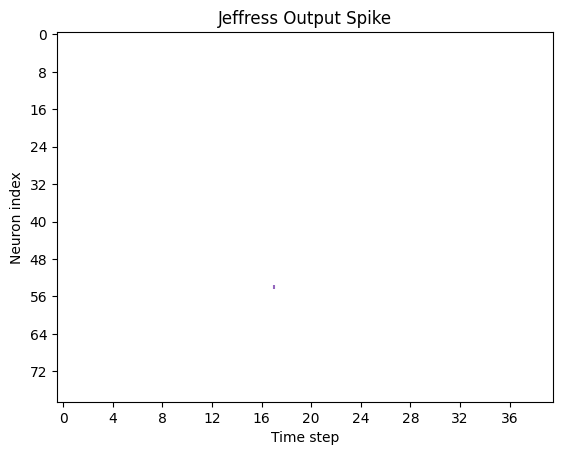

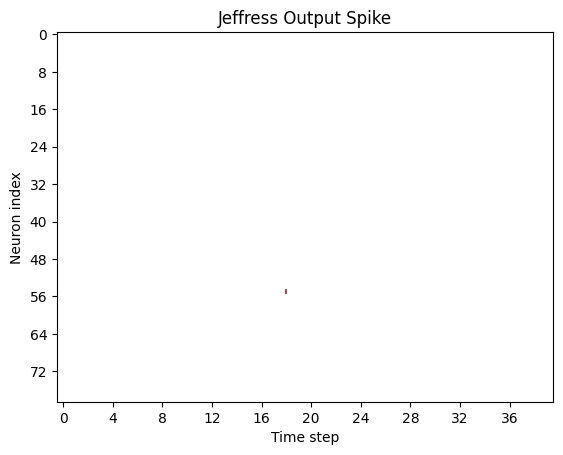

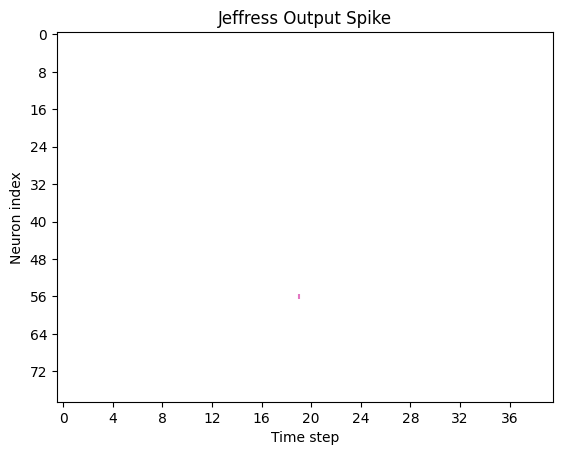

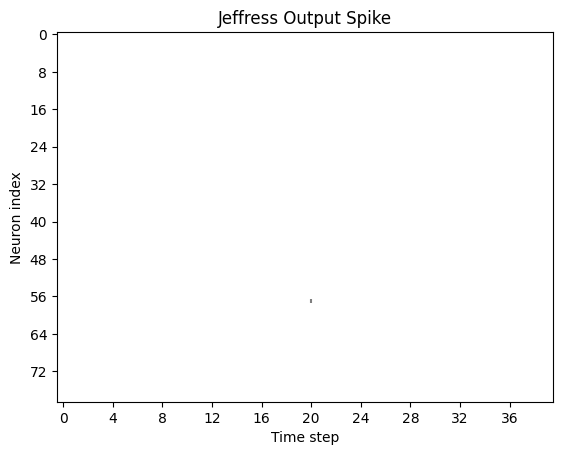

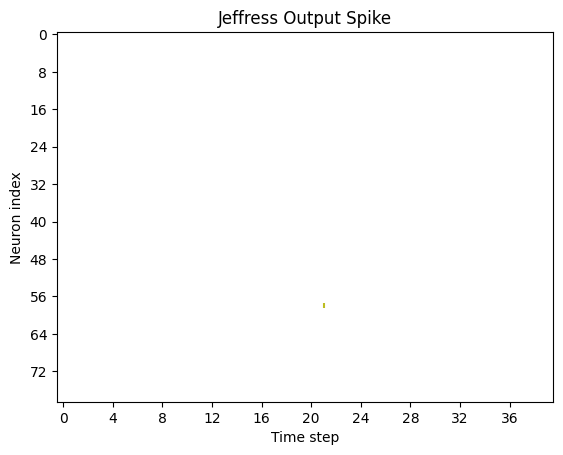

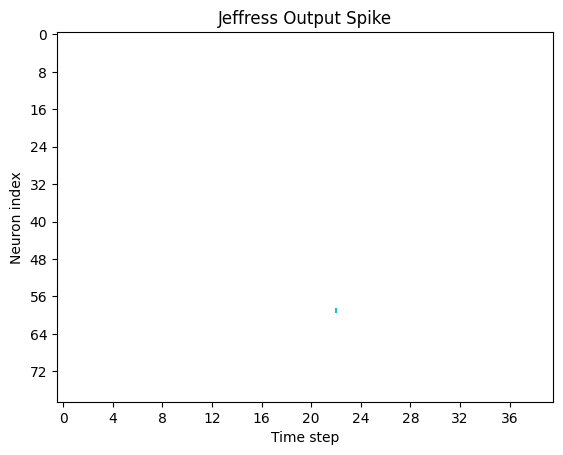

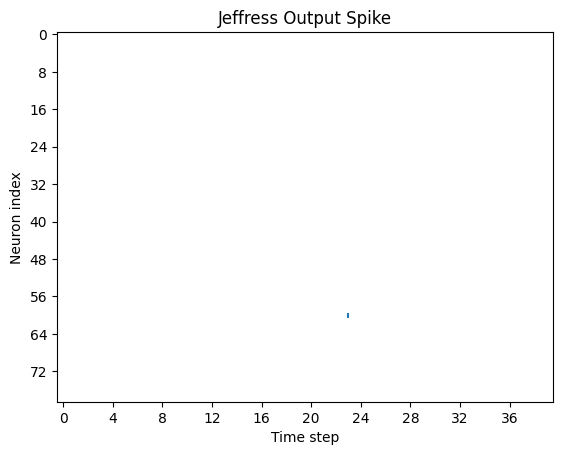

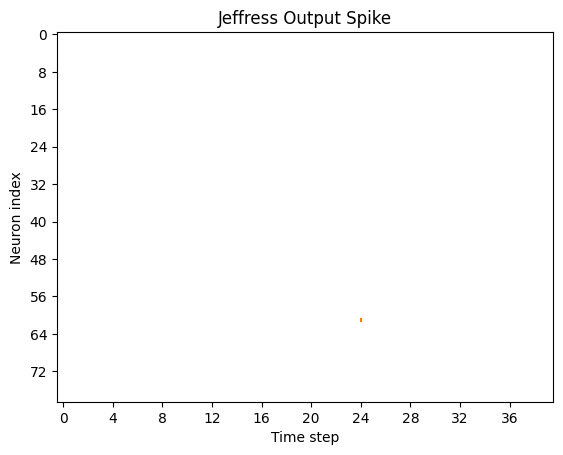

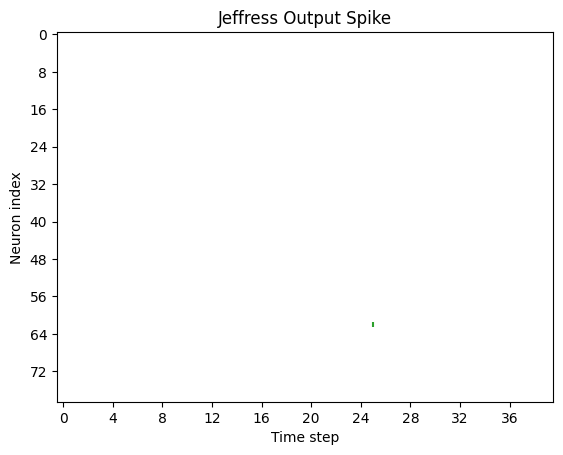

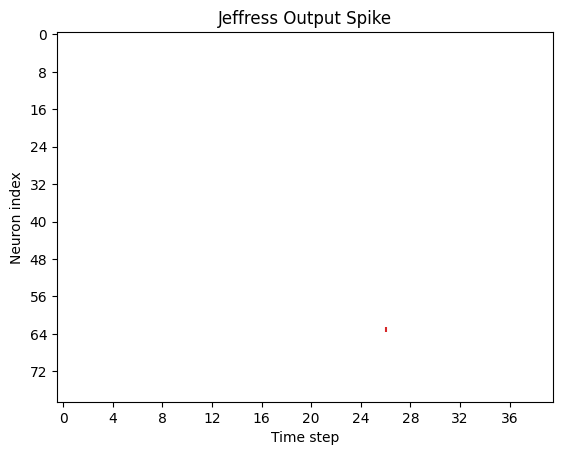

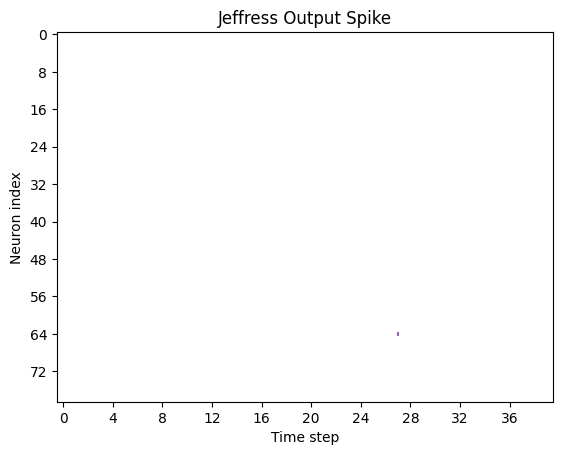

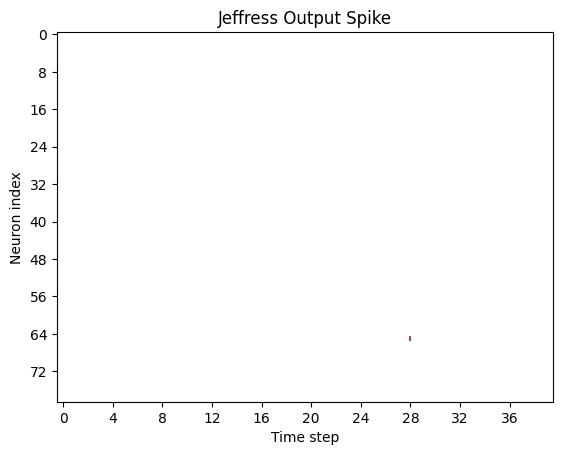

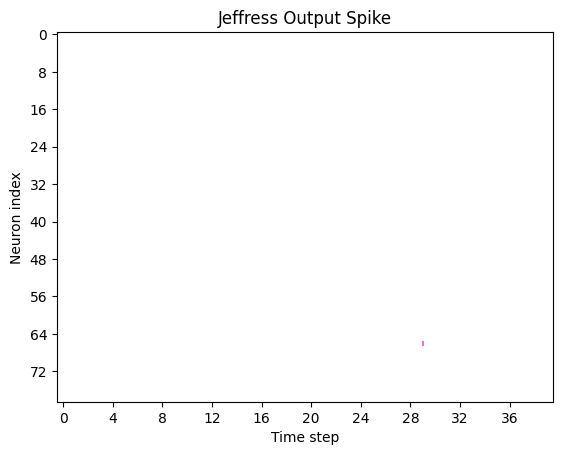

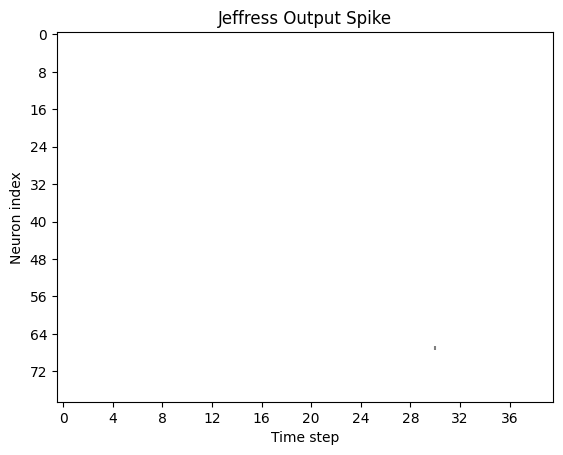

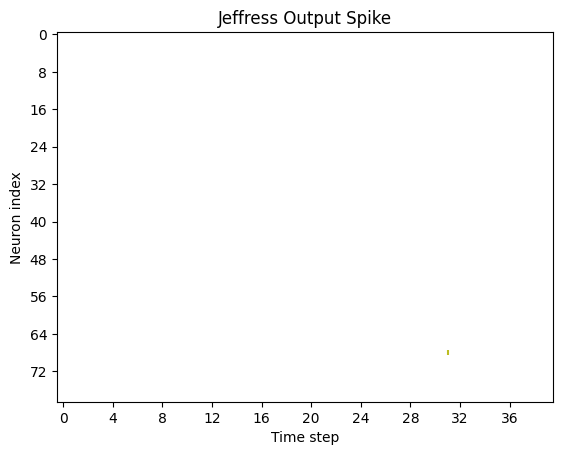

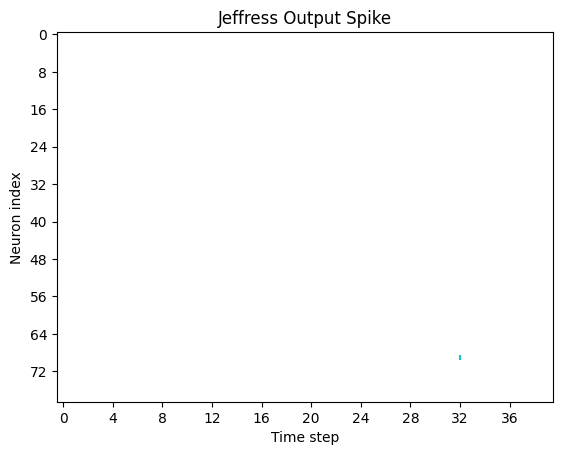

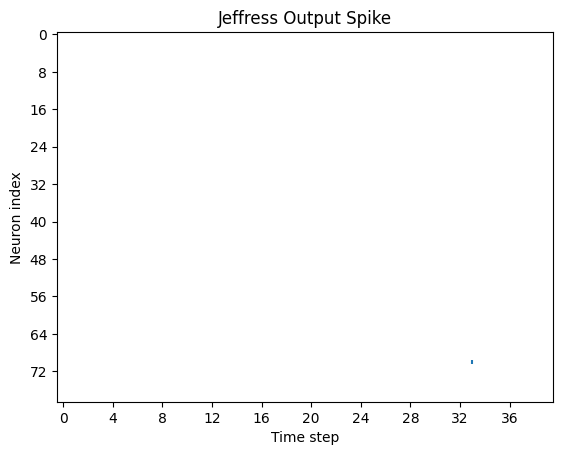

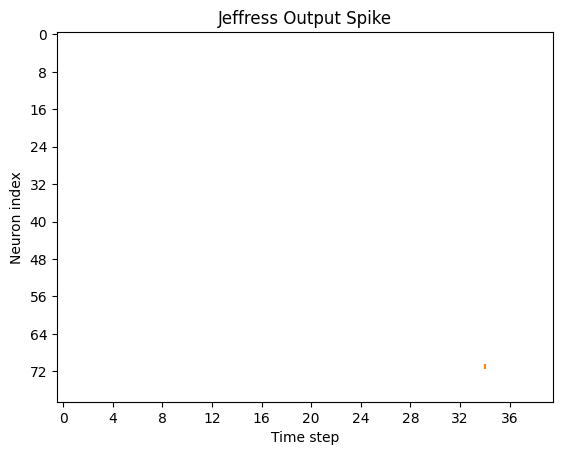

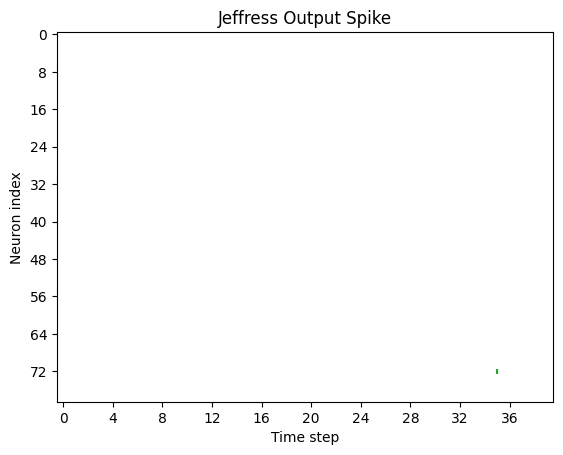

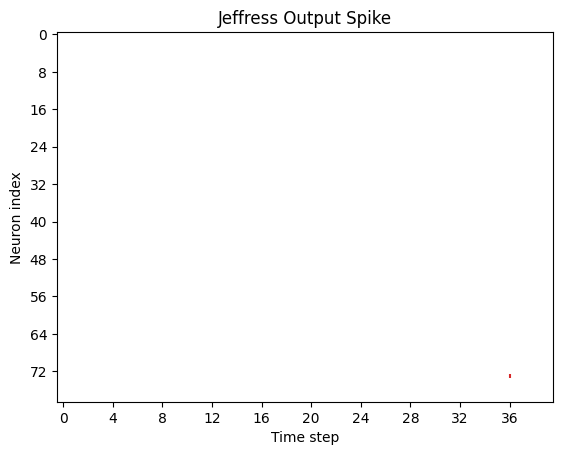

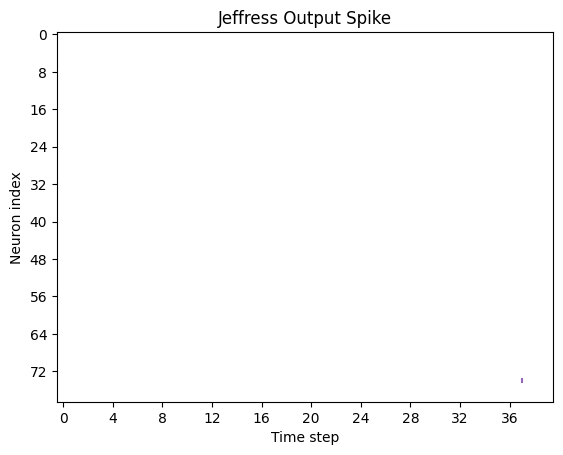

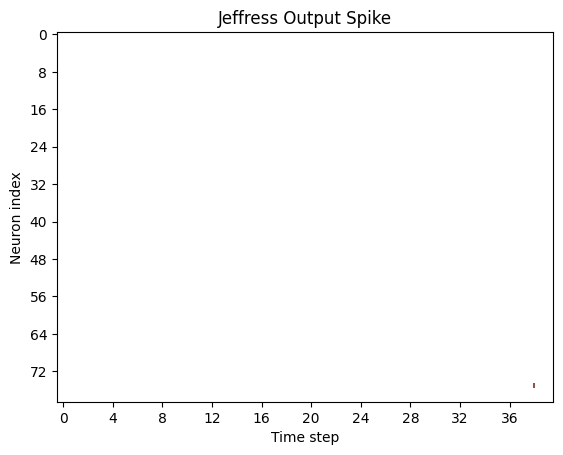

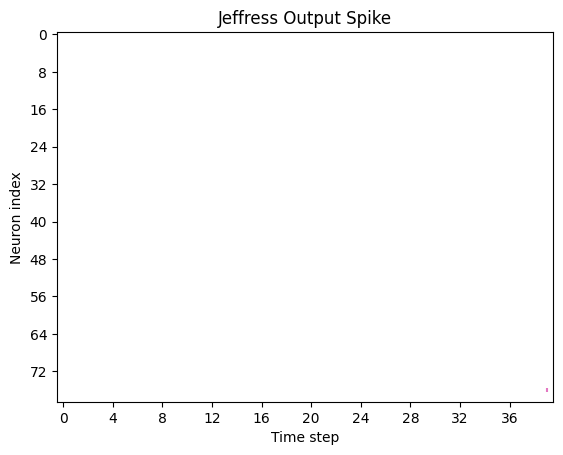

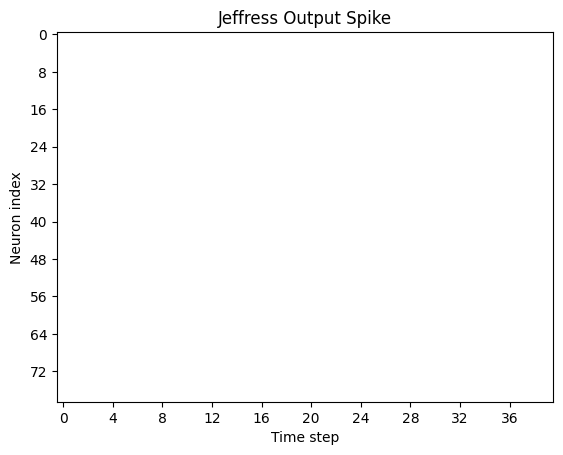

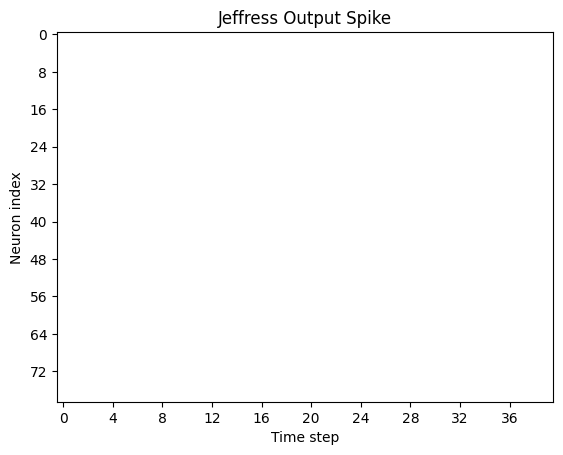

In [15]:
for i in range(-(T-1), T):
    x = torch.nn.functional.one_hot(torch.tensor([max(0, -i), max(0, i)]), num_classes=T).T.reshape(T, 1, 1, 2).float()
    n = IFNode(step_mode='m', store_v_seq=True)
    # display(n(j(x)).sum())
    plot_1d_spikes(out:=n(j(x)).squeeze().numpy(), title='Jeffress Output Spike', xlabel='Time step', ylabel='Neuron index', figsize=(4, 2),
                   dpi=200, plot_firing_rate=False)
    # plot_2d_heatmap(n.v_seq.squeeze().numpy(), title='Jeffress Output Potential', xlabel='Time step', ylabel='Neuron index', figsize=(8, 4), dpi=200)
plt.show()